In [33]:
import scipy
import numpy as np
import pandas as pd
from collections import Counter
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
class Expression_data:
    """class to store the expression dataset with some precomputations
    """

    def quantilerank(xs):
        """computes the quantile rank for the phylostrata

        :param xs: numpy array of values
        :type xs: np.array
        :return: quantile ranked values
        :rtype: np.array
        """
        ranks = scipy.stats.rankdata(xs, method='average')
        quantile_ranks = [scipy.stats.percentileofscore(ranks, rank, kind='weak') for rank in ranks]
        return np.array(quantile_ranks)/100

    def __init__(self,expression_data) -> None:
        """
        :param expression_data: expression dataset
        :type expression_data: pd.DataFrame
        """
        expression_data["Phylostratum"] = Expression_data.quantilerank(expression_data["Phylostratum"])
        self.full = expression_data
        exps = expression_data.iloc[:, 2:]
        #exps = exps.applymap(lambda x: np.sqrt(x))
        #exps = exps.applymap(lambda x: np.log(x + 1))
        self.age_weighted = exps.mul(expression_data["Phylostratum"], axis=0).to_numpy()
        self.expressions_n = exps.to_numpy()
        self.expressions = exps


arr = pd.read_csv("./example_data/Dmelanogaster/Dmelanogaster.csv",
                delimiter="\t")
expression_data = Expression_data(arr)

In [78]:
def generate_array_with_zeros(size, num_zeros):
    """
    Generate a NumPy array of given size with a specified number of zeros and the rest being ones.

    Args:
        size (int): Size of the array.
        num_zeros (int): Number of zeros to include in the array.

    Returns:
        numpy.ndarray: NumPy array with zeros and ones.
    """
    # Initialize the array with ones
    arr = np.ones(size, dtype=int)
    
    # Randomly select indices to set to zero
    zero_indices = np.random.choice(size, size=num_zeros, replace=False)
    
    # Set selected indices to zero
    arr[zero_indices] = 0
    
    return arr


In [79]:
exps_sum = np.sum(expression_data.expressions_n,axis=0)
weighted_sum = np.sum(expression_data.age_weighted,axis=0)

In [80]:
arr = generate_array_with_zeros(expression_data.expressions_n.shape[0],100)
n_arr = np.logical_not(arr).astype(int)

In [81]:
np.sum(expression_data.expressions_n[arr == 0],axis=0)

array([16601, 19899, 15795, 10179,  8564, 12228, 15891, 16254, 10778,
        3352,  3307,  8277, 10284, 14277,  2753, 12911, 13097, 16997,
       12958,  8499, 12085,  8591, 11026, 14138, 13091,  5225, 11648,
       15397,  9633, 13055,  6395,  3537,  5375,  8684,  7727, 14603,
        8911, 17618,  5227,  3387,  9379,  6080, 13598,  8357,  6556,
       10931, 12385,  4492, 11078, 10792,  9764, 10551,  9273,  5366,
       10406, 10546, 10770,  9453, 11419,  6942,  7515, 18056, 11764,
        9768, 13006, 16599, 16483, 16059, 14602, 13196, 10891, 15014,
        7030, 16159, 13829,  8768, 12237])

In [82]:
dict(sorted(Counter(expression_data.full.Phylostratum).items()))

{0.5288678031521389: 6577,
 0.6319556127372146: 1282,
 0.6558378899967835: 297,
 0.6769861691862334: 263,
 0.7167899646188485: 495,
 0.7476680604696044: 384,
 0.7602122869089739: 156,
 0.7626246381473142: 30,
 0.7635895786426503: 12,
 0.7754905114184625: 148,
 0.7885172081055002: 162,
 0.7895625603087809: 13,
 0.8027500804117079: 164,
 0.8165004824702478: 171,
 0.8366838211643615: 251,
 0.853972338372467: 215,
 0.8635413316178835: 119,
 0.8636217433258282: 1,
 0.8637825667417175: 2,
 0.9096172402701833: 570,
 0.9158089417819234: 77,
 0.9421839819877773: 328,
 0.947008684464458: 60,
 0.957462206497266: 130,
 0.9716950788034738: 177,
 0.9876165969765198: 198,
 0.9963814731424896: 109,
 1.0: 45}

In [83]:
counter = Counter(expression_data.full.Phylostratum)
phylostrata = np.array(list(counter.keys()))
weights = np.array(list(counter.values()))/ np.sum(np.array(list(counter.values())))

In [84]:

def weighted_random_choice(weights):
    """
    Generate random numbers according to given weights without using choice function.

    Args:
        weights (list): List of weights.

    Returns:
        function: A closure that generates random numbers.
    """
    # Compute the cumulative distribution function (CDF)
    cum_weights = np.cumsum(weights/np.sum(weights))
    
    def random_numbers(size):
        # Generate random numbers uniformly in [0, 1)
        random_values = np.random.rand(size)
        
        # Find the indices where random values fall in the CDF
        indices = np.searchsorted(cum_weights, random_values)
        
        return indices  # Add 1 to convert indices to numbers starting from 1
    
    return random_numbers


# Create a closure with fixed weights
generate_random_numbers = weighted_random_choice(np.array(list(counter.values())))


In [85]:
s = np.sum(expression_data.expressions_n,axis=0)

In [71]:
for x in range(1):
    rand = phylostrata[generate_random_numbers(expression_data.full.shape[0]*10000)]
    rand = rand.reshape((10000,expression_data.full.shape[0]))
    var = np.var(((rand @ expression_data.expressions_n)/s), axis =1)

In [72]:
var

array([1.82680904e-06, 4.65554409e-07, 9.60207190e-07, ...,
       8.20225994e-07, 5.22836755e-07, 4.03396087e-07])

(10000,)

In [52]:
generate_random_numbers()

15

In [86]:

import numpy as np

# Define the shapes of the matrices
rows_A = 1000

# Define a function to generate random matrix A row by row
def generate_matrix_A():
    for _ in range(rows_A):
        yield phylostrata[generate_random_numbers(expression_data.full.shape[0])]



# Multiply matrices A and B element-wise and sum along the common dimension
result = sum(a * b for a, b in zip(generate_matrix_A(), generate_matrix_A()))

print(result)  # Print the shape of the result


[423.87658317 426.59717322 423.52958485 ... 418.91967407 417.96943396
 418.58608759]


In [ ]:
result = sum(expression_data.expressions_n * b for b in custom_row_generator())

In [58]:
import numpy as np

# Define the shapes of the matrices
rows_A, common_dim, cols_B = 100000, 25000, 7

# Define a function to generate random matrix A row by row
def generate_matrix_A():
    for _ in range(rows_A):
        yield np.random.rand(common_dim)

# Define a function to generate random matrix B column by column
def generate_matrix_B():
    for _ in range(cols_B):
        yield np.random.rand(common_dim)

# Multiply matrices A and B element-wise and sum along the common dimension
result = np.zeros((rows_A, cols_B))
for i, a in enumerate(generate_matrix_A()):
    for j, b in enumerate(generate_matrix_B()):
        result[i, j] = np.sum(a * b)

print(result.shape)  # Print the shape of the result



(100000, 7)


In [92]:
rows_A = 100000

# Generate the predefined matrix B
matrix_B = expression_data.expressions_n

# Define a generator to generate rows of matrix A
def generate_rows_A():
    for _ in range(rows_A):
        yield phylostrata[generate_random_numbers(expression_data.full.shape[0])]

# Initialize the result matrix
result = np.zeros((rows_A, expression_data.expressions_n.shape[1]))

# Generate rows of matrix A and perform matrix multiplication with matrix B
for i, row_A in enumerate(generate_rows_A()):
    result[i] = np.dot(row_A, matrix_B)
    if i % 1000 == 0:
        print(i,end=" ")

print(result.shape)

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 64000 65000 66000 67000 68000 69000 70000 71000 72000 73000 74000 75000 76000 77000 78000 79000 80000 81000 82000 83000 84000 85000 86000 87000 88000 89000 90000 91000 92000 93000 94000 95000 96000 97000 98000 99000 (100000, 77)


In [93]:
np.var(result/s,axis = 1)

array([6.89161670e-06, 1.31266465e-05, 3.81297267e-05, ...,
       7.97762773e-06, 3.33754359e-05, 1.17344238e-05])

In [95]:
extr = np.array([line.strip() for line in open("./results/Dmelanogaster/extracted_genes.txt", 'r')])

In [90]:
epi = np.array([line.strip() for line in open("./results/Dmelanogaster/epi.txt", 'r')])

In [14]:
set(epi).intersection(set(extr))

set()

In [96]:
arr = pd.read_csv("./example_data/Dmelanogaster/Dmelanogaster.csv", delimiter="\t")

In [97]:
plt.pyplot.hist(arr[arr["GeneID"].isin(extr)].Phylostratum)

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

In [98]:
max(arr[arr["GeneID"].isin(extr)].Phylostratum) - min(arr[arr["GeneID"].isin(extr)].Phylostratum)

29

In [99]:
ex = arr[arr["GeneID"].isin(extr)]

In [100]:
ex

,Phylostratum,GeneID,DM0001,DM0002,DM0003,DM0004,DM0005,DM0006,DM0007,DM0008,...,DM0077,DM0078,DM0081,DM0083,DM0084,DM0085,DM0087,DM0088,DM0089,DM0090
68,27,FBgn0000216,2,11,151,94,27,1121,390,374,...,6,3,0,0,0,0,0,0,0,0
260,22,FBgn0001174,6,0,179,94,590,304,4694,2426,...,0,0,27,2,0,0,6,0,0,0
292,22,FBgn0001256,0,0,1,0,5,9,0,16,...,6,1,33,6,4,6,18,13,0,1
480,27,FBgn0003060,0,0,0,0,0,0,0,0,...,3601,5897,465,9501,2932,1680,24581,10027,2257,17114
610,1,FBgn0003502,429,555,524,318,384,724,1004,1230,...,271,312,183,213,347,156,212,181,170,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10376,13,FBgn0052570,25,43,20,13,9,29,18,9,...,68,75,4377,37,105,52,39,42,35,24
10428,15,FBgn0052694,0,0,0,0,0,0,0,0,...,5665,1880,11331,348,6464,1756,465,262,200,338
10973,1,FBgn0083975,139,545,70,201,34,155,128,159,...,335,588,150,248,222,126,250,375,74,134
11544,17,FBgn0260011,18,16,8,46,9,456,188,91,...,12,29,57,2,21,21,38,18,14,0


/var/folders/h5/kf2tqgtj18b2sq2s5hggdk940002n8/T/ipykernel_64012/1823978215.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = "steelblue" if row[0] > 5 else "lightcoral"


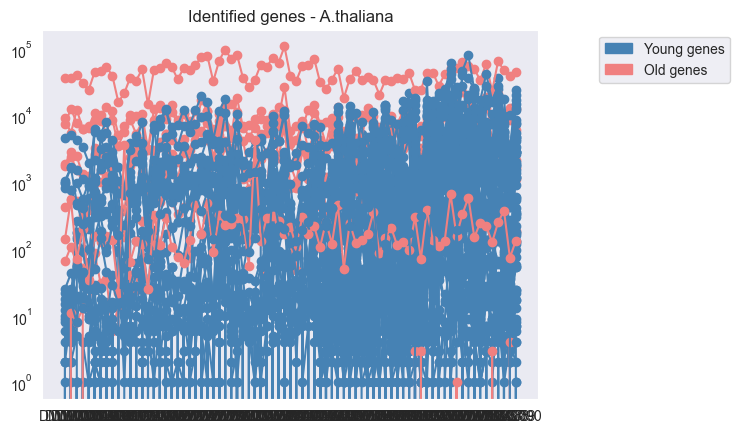

In [102]:
for index, row in ex.iterrows():
    color = "steelblue" if row[0] > 5 else "lightcoral"
    plt.plot(row[2:], marker='o', label=f'Row {index+1}', color = color)

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='steelblue', label="Young genes")
blue_patch = mpatches.Patch(color='lightcoral', label='Old genes')
plt.legend(handles=[red_patch, blue_patch], loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title("Identified genes - A.thaliana")
plt.yscale('log')

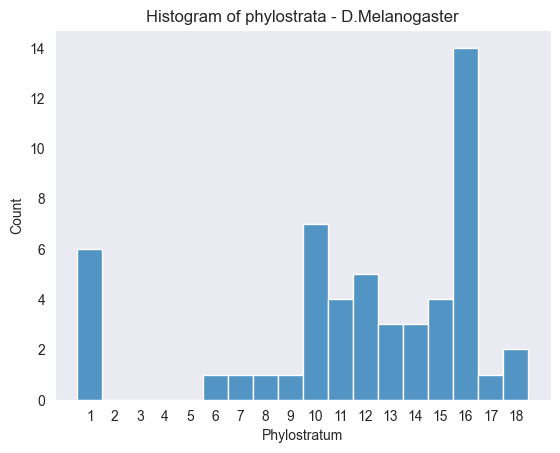

In [68]:
from matplotlib.ticker import MaxNLocator
sns.set_style("dark")
sns.histplot(data=arr[arr["GeneID"].isin(extr)], x="Phylostratum",bins = 29,discrete=True)
# Set the x-axis ticks to integers
plt.xticks(range(min(arr[arr["GeneID"].isin(extr)].Phylostratum), max(arr[arr["GeneID"].isin(extr)].Phylostratum) + 1))
plt.title("Histogram of phylostrata - D.Melanogaster")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
# Show the plot
plt.show()